## Importar librerias necesarias

In [1]:
from collections import Counter

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from collections import Counter
# optimizar el modelo con optimizacion de hiperparametros optuna
import optuna
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.decomposition import PCA

## Cargar dataset.

In [2]:
path = 'ML_cars.csv'

datos = pd.read_csv(path)
datos

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## inspeccionar dataset.

In [3]:
datos['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
datos.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
datos.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Evaluar datos categoricos

C:\Users\Rhamer\AppData\Local\Temp\ipykernel_5696\1790055092.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Rhamer\AppData\Local\Temp\ipykernel_5696\1790055092.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Rhamer\AppData\Local\Temp\ipykernel_5696\1790055092.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Rhamer\AppData\Local\Temp\ipykernel_5696\1790055092.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].

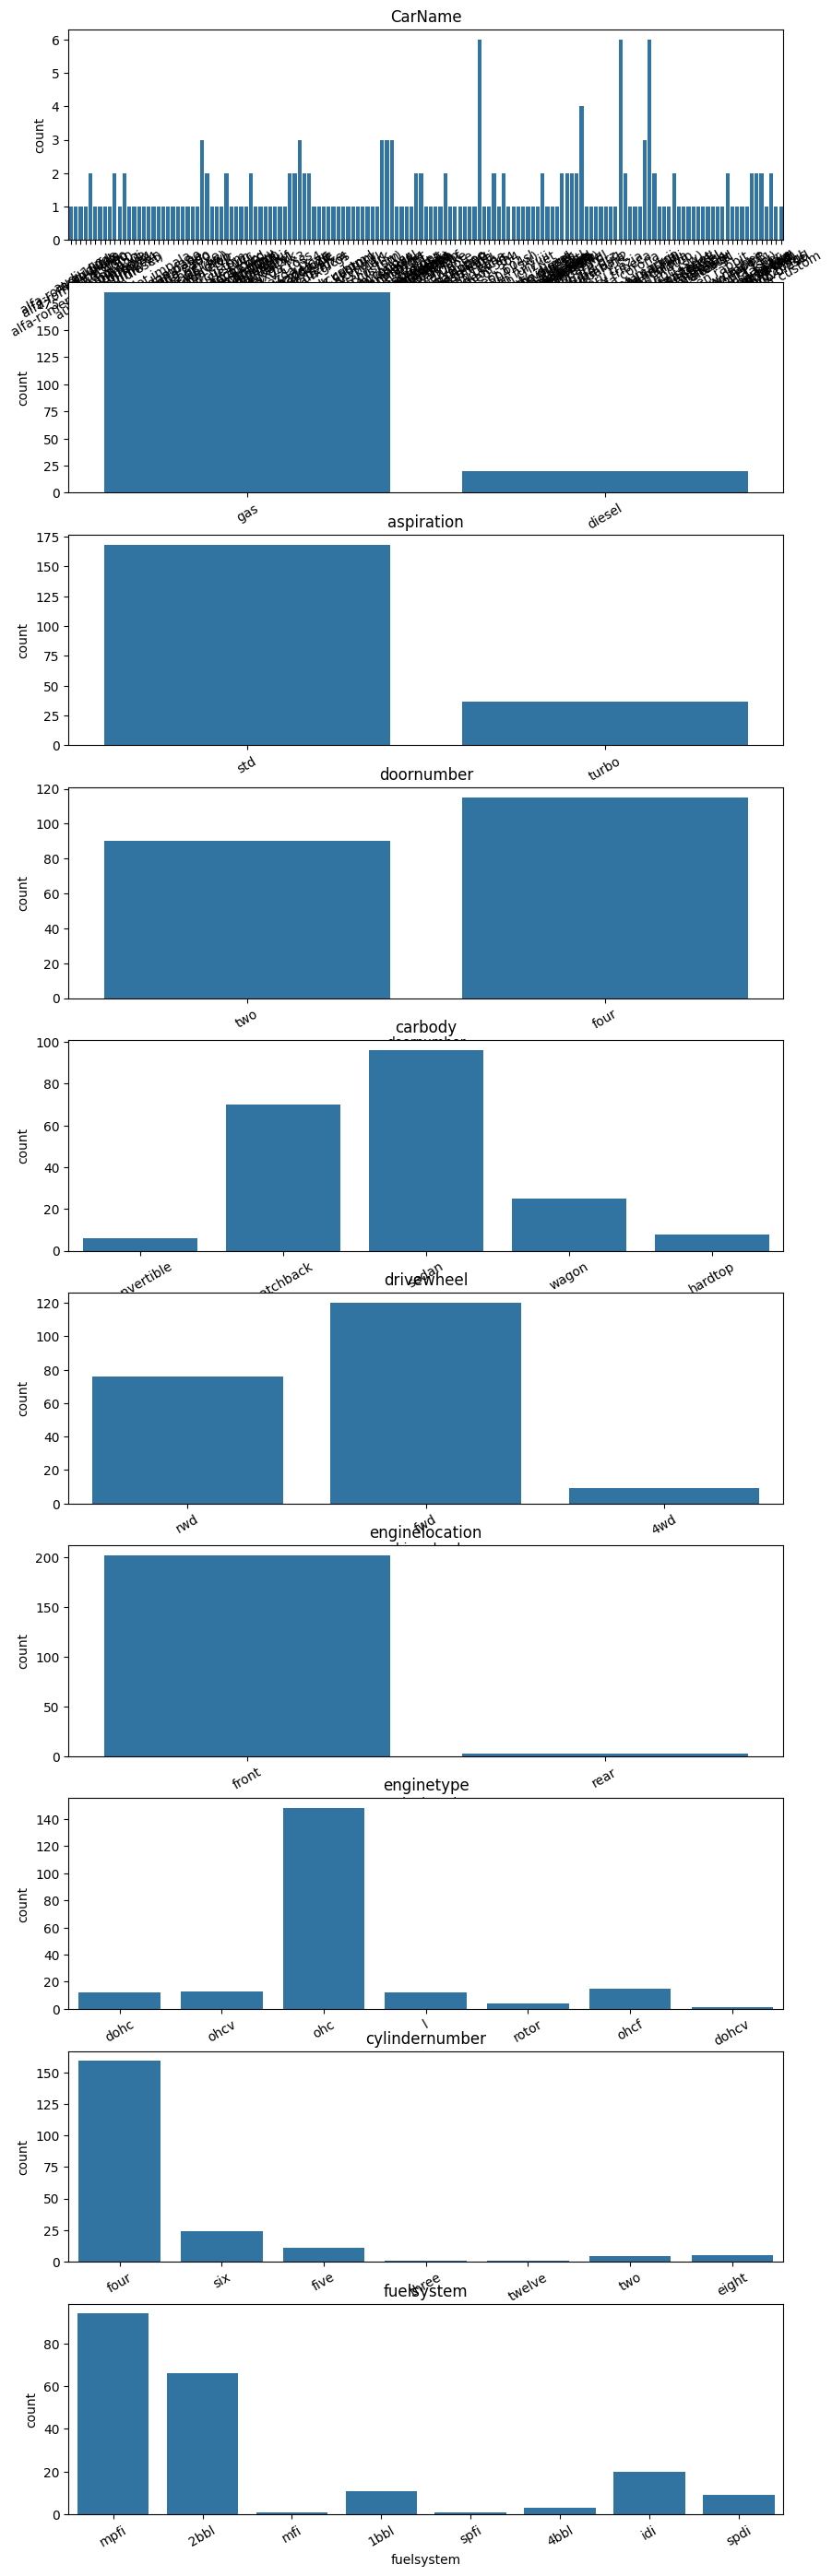

In [8]:
cat_cols =  ['CarName','fueltype', 'aspiration', 'doornumber','carbody',
             'drivewheel', 'enginelocation','enginetype', 'cylindernumber','fuelsystem']


fig, ax= plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10,35))

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=datos, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)


### Eliminar Columnas

In [9]:
# variables que a utilizar en el modelo.
"""wheelbase
carlength
carwidth
curbweight
cylindernumber
enginesize
boreratio
horsepower
drivewheel
fuelsystem
citympg
highwaympg
"""
# Lista de variables a eliminar.
drop_colums = ['car_ID', 'symboling', 'CarName','fueltype', 'aspiration', 'doornumber',
               'carbody', 'enginelocation', 'carheight', 'enginetype', 'stroke','compressionratio', 'peakrpm' ]

datos = datos.drop(columns=drop_colums)

In [10]:
datos

,drivewheel,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,rwd,88.6,168.8,64.1,2548,four,130,mpfi,3.47,111,21,27,13495.0
1,rwd,88.6,168.8,64.1,2548,four,130,mpfi,3.47,111,21,27,16500.0
2,rwd,94.5,171.2,65.5,2823,six,152,mpfi,2.68,154,19,26,16500.0
3,fwd,99.8,176.6,66.2,2337,four,109,mpfi,3.19,102,24,30,13950.0
4,4wd,99.4,176.6,66.4,2824,five,136,mpfi,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,rwd,109.1,188.8,68.9,2952,four,141,mpfi,3.78,114,23,28,16845.0
201,rwd,109.1,188.8,68.8,3049,four,141,mpfi,3.78,160,19,25,19045.0
202,rwd,109.1,188.8,68.9,3012,six,173,mpfi,3.58,134,18,23,21485.0
203,rwd,109.1,188.8,68.9,3217,six,145,idi,3.01,106,26,27,22470.0


### Proceso de Transformacion de datos

> Transformar variables categoricas a numericas binarias.

In [11]:
# Criterios para transformar categoricas

col_cat = {
    'cylindernumber': {'two':2,'three':3,'four':4, 'five':5, 'six':6,'eight':8, 'twelve':12}
}

for col,v0 in zip(col_cat,col_cat.values()):
    datos[col] = datos[col].map(v0)
datos

,drivewheel,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,rwd,88.6,168.8,64.1,2548,4,130,mpfi,3.47,111,21,27,13495.0
1,rwd,88.6,168.8,64.1,2548,4,130,mpfi,3.47,111,21,27,16500.0
2,rwd,94.5,171.2,65.5,2823,6,152,mpfi,2.68,154,19,26,16500.0
3,fwd,99.8,176.6,66.2,2337,4,109,mpfi,3.19,102,24,30,13950.0
4,4wd,99.4,176.6,66.4,2824,5,136,mpfi,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,rwd,109.1,188.8,68.9,2952,4,141,mpfi,3.78,114,23,28,16845.0
201,rwd,109.1,188.8,68.8,3049,4,141,mpfi,3.78,160,19,25,19045.0
202,rwd,109.1,188.8,68.9,3012,6,173,mpfi,3.58,134,18,23,21485.0
203,rwd,109.1,188.8,68.9,3217,6,145,idi,3.01,106,26,27,22470.0


### Obtener variables dummies

> Transformar variables categoricas a dummies

In [12]:
col_cat = ['drivewheel', 'fuelsystem']
datos = pd.get_dummies(datos, columns=col_cat, drop_first=True)
datos

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,2548,4,130,3.47,111,21,27,13495.0,False,True,False,False,False,False,True,False,False
1,88.6,168.8,64.1,2548,4,130,3.47,111,21,27,16500.0,False,True,False,False,False,False,True,False,False
2,94.5,171.2,65.5,2823,6,152,2.68,154,19,26,16500.0,False,True,False,False,False,False,True,False,False
3,99.8,176.6,66.2,2337,4,109,3.19,102,24,30,13950.0,True,False,False,False,False,False,True,False,False
4,99.4,176.6,66.4,2824,5,136,3.19,115,18,22,17450.0,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,4,141,3.78,114,23,28,16845.0,False,True,False,False,False,False,True,False,False
201,109.1,188.8,68.8,3049,4,141,3.78,160,19,25,19045.0,False,True,False,False,False,False,True,False,False
202,109.1,188.8,68.9,3012,6,173,3.58,134,18,23,21485.0,False,True,False,False,False,False,True,False,False
203,109.1,188.8,68.9,3217,6,145,3.01,106,26,27,22470.0,False,True,False,False,True,False,False,False,False


## Analisis de Correlacion

In [13]:
corr = datos.corr()

In [14]:
corr

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
wheelbase,1.000000,0.874587,0.795144,0.776386,0.339507,0.569329,0.488750,0.353294,-0.470414,-0.544082,0.577816,-0.460355,0.498830,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carlength,0.874587,1.000000,0.841118,0.877728,0.430672,0.683360,0.606454,0.552623,-0.670909,-0.704662,0.682920,-0.508714,0.538370,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
carwidth,0.795144,0.841118,1.000000,0.867032,0.545007,0.735433,0.559150,0.640732,-0.642704,-0.677218,0.759325,-0.472116,0.511149,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158
curbweight,0.776386,0.877728,0.867032,1.000000,0.609727,0.850594,0.648480,0.750739,-0.757414,-0.797465,0.835305,-0.666039,0.669987,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052
cylindernumber,0.339507,0.430672,0.545007,0.609727,1.000000,0.846031,0.231399,0.692016,-0.445837,-0.466666,0.718305,-0.327460,0.347350,-0.252848,-0.269058,-0.024544,-0.024707,0.392551,-0.075619,-0.024707
enginesize,0.569329,0.683360,0.735433,0.850594,0.846031,1.000000,0.583774,0.809769,-0.653658,-0.677470,0.874145,-0.518391,0.565509,-0.442562,-0.166946,0.069594,0.049033,0.483520,0.004490,-0.013327
boreratio,0.488750,0.606454,0.559150,0.648480,0.231399,0.583774,1.000000,0.573677,-0.584532,-0.587012,0.553173,-0.583087,0.574105,-0.353342,0.000110,0.054451,0.070030,0.419335,-0.004213,0.025977
horsepower,0.353294,0.552623,0.640732,0.750739,0.692016,0.809769,0.573677,1.000000,-0.801456,-0.770544,0.808139,-0.544438,0.575564,-0.541966,-0.009630,-0.163926,0.072562,0.628372,0.117664,-0.025056
citympg,-0.470414,-0.670909,-0.642704,-0.757414,-0.445837,-0.653658,-0.584532,-0.801456,1.000000,0.971337,-0.685751,0.563879,-0.545789,0.520751,-0.153487,0.255963,-0.066724,-0.644489,-0.123954,-0.013083
highwaympg,-0.544082,-0.704662,-0.677218,-0.797465,-0.466666,-0.677470,-0.587012,-0.770544,0.971337,1.000000,-0.697599,0.600828,-0.566149,0.528009,-0.137506,0.191392,-0.068807,-0.610813,-0.106615,-0.017848


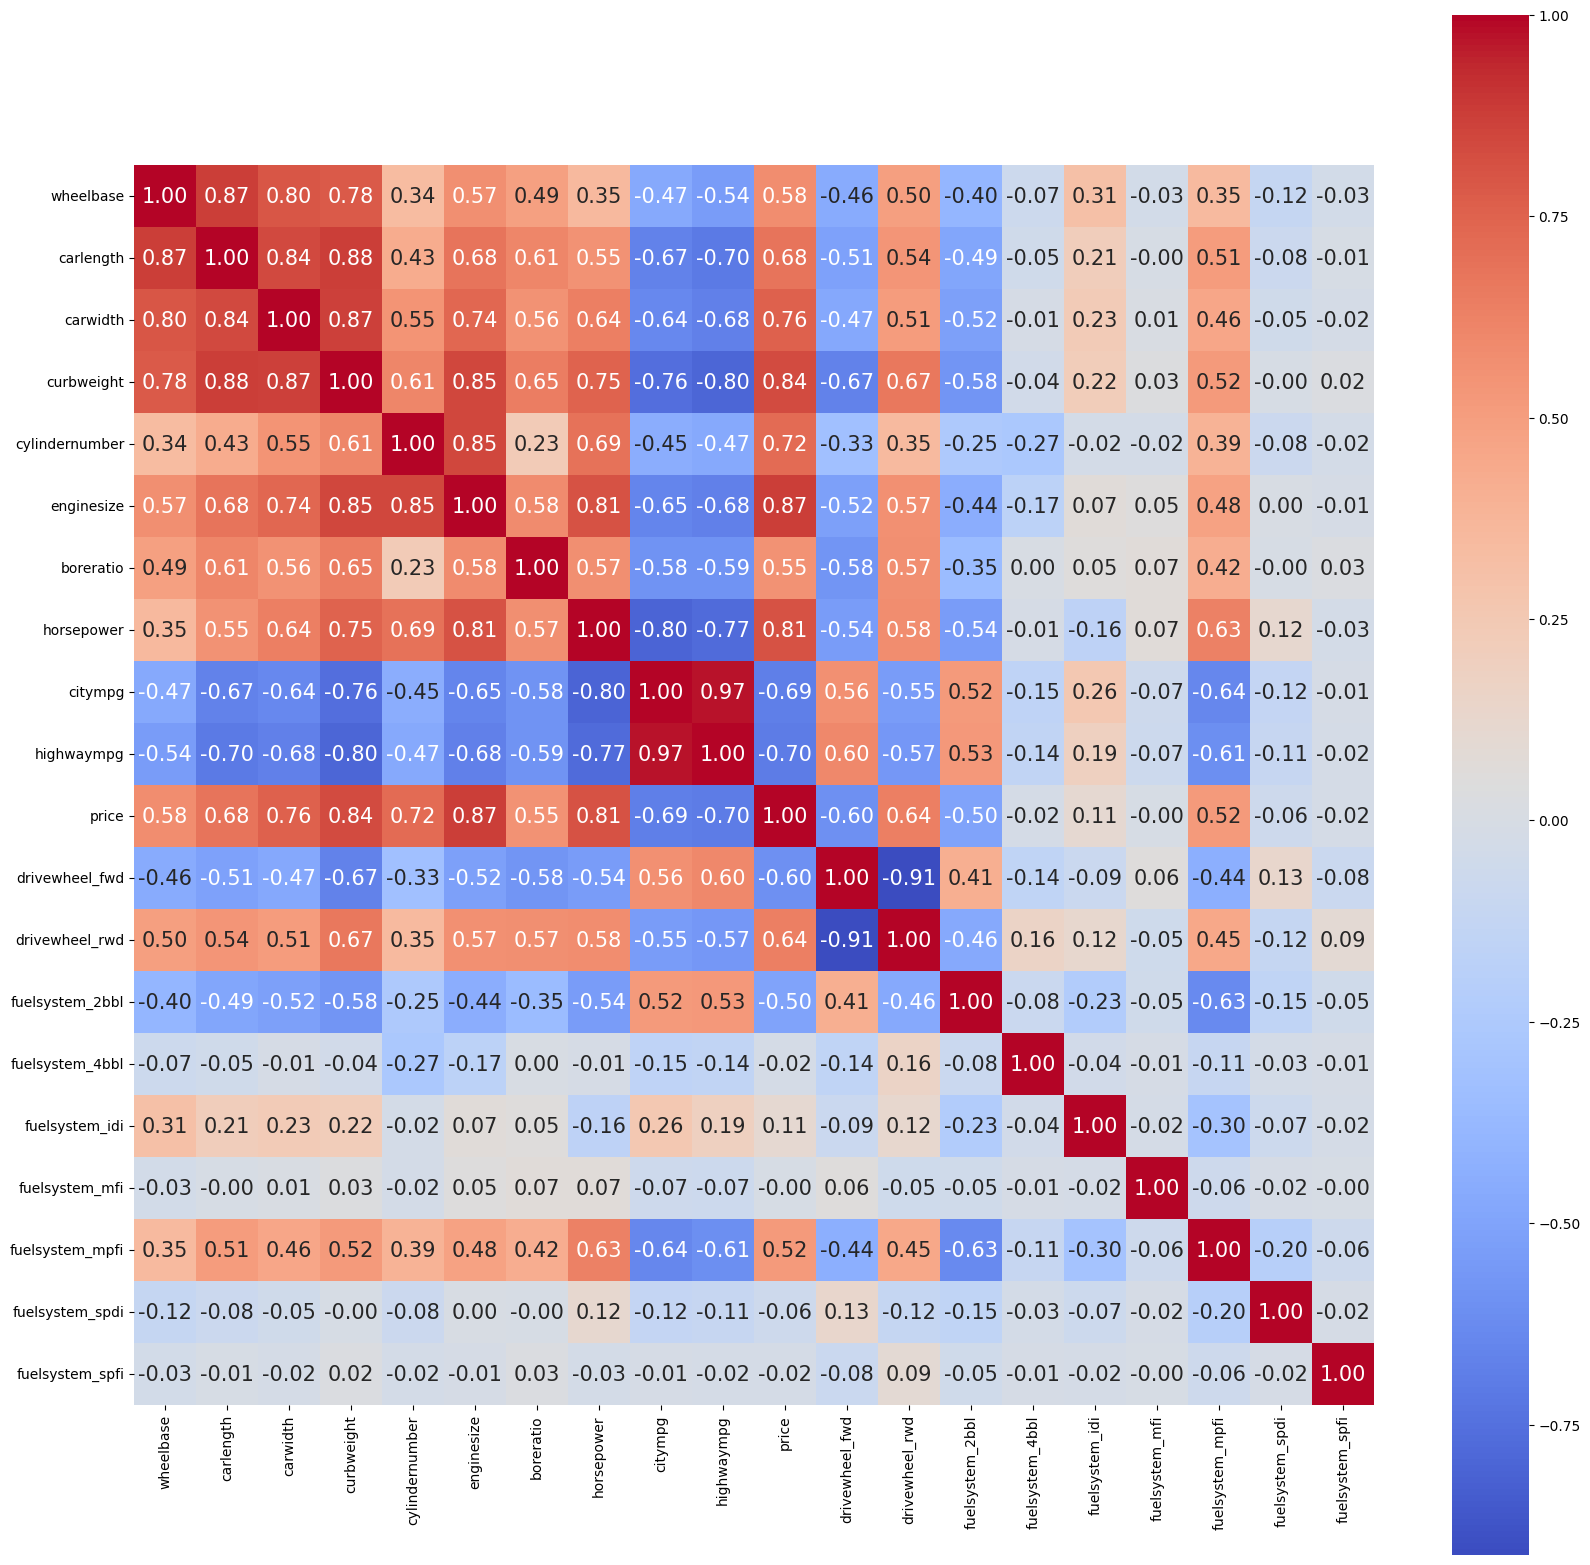

In [15]:
# Variable con correlacion de datos desde el Dataset con pandas.
corr = datos.corr()

# Diagaramado con matplotlib y Seaborn
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= datos.columns, 
           yticklabels= datos.columns,
           cmap= 'coolwarm')
plt.show()

## Crear Rango de gamas

In [16]:
# Cálculo de los límites
precio_min = datos['price'].min()
precio_max = datos['price'].max()
mitad = (precio_max - precio_min) / 2

# Límites ajustados
limite_baja_alta = precio_min + mitad

# Discretización del precio
bins = [precio_min, limite_baja_alta, precio_max]
labels = ['Baja', 'Alta']

# Discretización del precio
datos['gama'] = pd.cut(datos['price'], bins=bins, labels=labels, include_lowest=True)

datos

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,...,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,gama
0,88.6,168.8,64.1,2548,4,130,3.47,111,21,27,...,False,True,False,False,False,False,True,False,False,Baja
1,88.6,168.8,64.1,2548,4,130,3.47,111,21,27,...,False,True,False,False,False,False,True,False,False,Baja
2,94.5,171.2,65.5,2823,6,152,2.68,154,19,26,...,False,True,False,False,False,False,True,False,False,Baja
3,99.8,176.6,66.2,2337,4,109,3.19,102,24,30,...,True,False,False,False,False,False,True,False,False,Baja
4,99.4,176.6,66.4,2824,5,136,3.19,115,18,22,...,False,False,False,False,False,False,True,False,False,Baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,4,141,3.78,114,23,28,...,False,True,False,False,False,False,True,False,False,Baja
201,109.1,188.8,68.8,3049,4,141,3.78,160,19,25,...,False,True,False,False,False,False,True,False,False,Baja
202,109.1,188.8,68.9,3012,6,173,3.58,134,18,23,...,False,True,False,False,False,False,True,False,False,Baja
203,109.1,188.8,68.9,3217,6,145,3.01,106,26,27,...,False,True,False,False,True,False,False,False,False,Baja


<Axes: xlabel='gama', ylabel='count'>

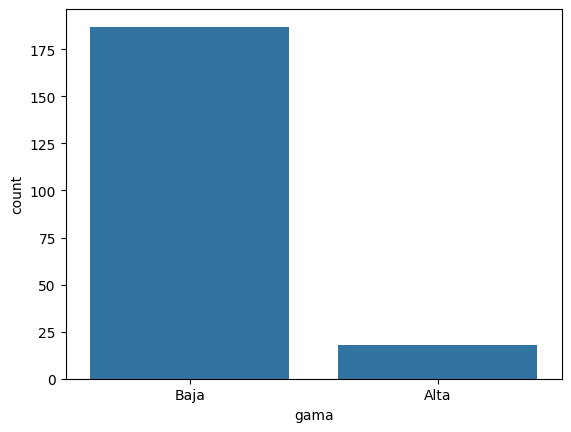

In [17]:
sns.countplot(x='gama', data=datos)

## Castear Gama

In [18]:
datos['gama'] = datos['gama'].map(
    {'Baja':0, 'Alta':1 }
)

In [19]:
datos['gama'].unique()

[0, 1]
Categories (2, int64): [0 < 1]

## Seleccionar Variables X, Y.

In [20]:
columnas_drop = ['price', 'gama']

X = datos.drop(columns=columnas_drop, axis=1)
Y = datos['gama']


In [21]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    0
202    0
203    0
204    0
Name: gama, Length: 205, dtype: category
Categories (2, int64): [0 < 1]

In [22]:
Counter(Y)

Counter({0: 187, 1: 18})

## Aplicar PCA

In [23]:
# pca = PCA(n_components=3)
# pca.fit(X_scaled)

# X_pca = pca.transform(X_scaled)

In [24]:
# print(X_scaled.shape)
# print(X_pca.shape)

### Division de datos

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.35, random_state=1990, stratify=Y)

### Prueba de modelos de categorizacion

In [26]:
# Variable con las listas de elementos
modelos = []
resultados = []
nombres_modelos = []

# Agregar Modelos a las listas
modelos.append(('Regresion Logistica', LogisticRegression()))
modelos.append(('Arbol de Decision', DecisionTreeClassifier()))
modelos.append(('Bosque de Clasificacion', RandomForestClassifier()))

In [27]:
# For para instanciar los modelos con cross_val_score y obtener los parametros de manera individual
for nombre_modelo, model in modelos:
    kfold = StratifiedKFold(n_splits=3,shuffle=True,random_state=1990)
    resultados_cross_value = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='roc_auc')
    nombres_modelos.append(nombre_modelo)
    resultados.append(resultados_cross_value)

# imprimir resultado de modelos.
for i in range(len(nombres_modelos)):
    print(nombres_modelos[i], resultados[i].mean())

c:\Users\Rhamer\Desktop\Henry\entorno\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rhamer\Desktop\Henry\entorno\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Regresion Logistica 0.9855691056910568
Arbol de Decision 1.0
Bosque de Clasificacion 1.0


### Crear un Pipeline

In [28]:
# crear Pipeline
modelo = Pipeline((
    ('scale', StandardScaler()), ('log_reg', LogisticRegression(C=10, solver='lbfgs', n_jobs=-1,fit_intercept=True))
))

modelo.fit(X_train,Y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('log_reg', LogisticRegression(C=10, n_jobs=-1))])

## Probar Modelo entrenado.

In [29]:
Y_fit_train = modelo.predict(X_train)
Y_fit_test = modelo.predict(X_test)

### Crear un Pipeline

In [30]:
print(classification_report(Y_train, Y_fit_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00        12

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133



In [31]:
print(classification_report(Y_test, Y_fit_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       0.86      1.00      0.92         6

    accuracy                           0.99        72
   macro avg       0.93      0.99      0.96        72
weighted avg       0.99      0.99      0.99        72



In [32]:
matiz_train = confusion_matrix(Y_train, Y_fit_train)
matiz_train

array([[121,   0],
       [  0,  12]], dtype=int64)

In [33]:
matiz_test = confusion_matrix(Y_test, Y_fit_test)
matiz_test

array([[65,  1],
       [ 0,  6]], dtype=int64)

## Entrenar modelo de Bosque Aleatorio.

In [34]:
modelo_bosque = DecisionTreeClassifier(max_depth=2, random_state=1990)
modelo_bosque.fit(X_train, Y_train)
Y_train_pred = modelo_bosque.predict(X_train)
Y_test_pred = modelo_bosque.predict(X_test)
print(classification_report(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00        12

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00         6

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



In [35]:
print(confusion_matrix(Y_train, Y_train_pred))
print(confusion_matrix(Y_test, Y_test_pred))


[[121   0]
 [  0  12]]
[[66  0]
 [ 0  6]]
